# 📈 EDA Notebook 03 – Time-Based Trends

This notebook explores the **temporal patterns** of airplane crashes. It answers questions like:
- How have crashes changed over the years?
- Which decades or seasons saw more incidents?
- Are crashes more likely during certain times of day?
- How do fatality counts trend over time?
- Do military crashes spike during wars?

Insights are extracted using the feature-engineered dataset.

In [22]:
# Load the feature-engineered dataset
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid")

df = pd.read_csv("feature_engineered_crashes.csv")

# Quick preview
df.head()

,date,time,location,operator,route,ac_type,aboard,aboard_passangers,aboard_crew,fatalities,...,summary,Year,Month,Weekday,Decade,is_Military,Fatality_Rate,Is_Fatal,Aircraft_Type_Simple,Crash_Location_Type
0,1908-09-17,17:18:00,"Fort Myer, Virginia",Military - U.S. Army,Demonstration,Wright Flyer III,2.0,1.0,1.0,1.0,...,"During a demonstration flight, a U.S. Army fly...",1908,9,Thursday,1900,1,0.5,1,Other,Land
1,1912-07-12,06:30:00,"Atlantic City, New Jersey",Military - U.S. Navy,Test flight,Dirigible,5.0,0.0,5.0,5.0,...,First U.S. dirigible Akron exploded just offsh...,1912,7,Friday,1910,1,1.0,1,Airship,Land
2,1913-08-06,Unknown,"Victoria, British Columbia, Canada",Private,Unknown,Curtiss seaplane,1.0,0.0,1.0,1.0,...,The first fatal airplane accident in Canada oc...,1913,8,Wednesday,1910,0,1.0,1,Seaplane,Land
3,1913-09-09,18:30:00,Over the North Sea,Military - German Navy,Unknown,Zeppelin L-1 (airship),20.0,0.0,0.0,14.0,...,The airship flew into a thunderstorm and encou...,1913,9,Tuesday,1910,1,0.7,1,Airship,Water
4,1913-10-17,10:30:00,"Near Johannisthal, Germany",Military - German Navy,Unknown,Zeppelin L-2 (airship),30.0,0.0,0.0,30.0,...,Hydrogen gas which was being vented was sucked...,1913,10,Friday,1910,1,1.0,1,Airship,Land


10. How do crash counts trend over years?

Total number of crashes per year (last 15 years):
Year
2009    46
2010    40
2011    35
2012    26
2013    25
2014    23
2015    17
2016    23
2017    15
2018    16
2019    13
2020     8
2021     9
2022     6
2023     4
Name: count, dtype: int64


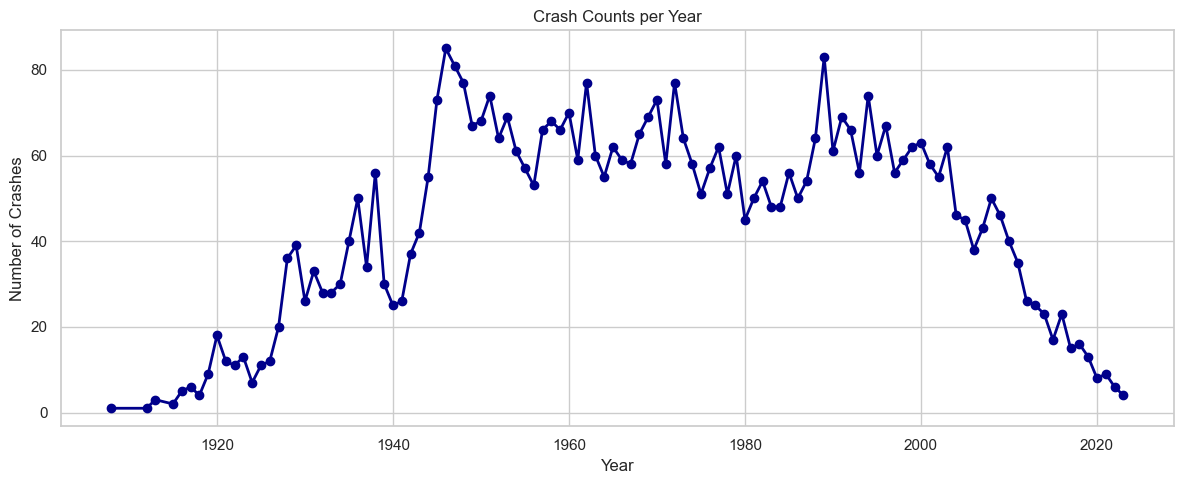

In [23]:
# Set visual style
sns.set(style="whitegrid")
plt.figure(figsize=(12, 5))

# Count crashes per year
crashes_per_year = df["Year"].value_counts().sort_index()

# Show the crash counts in tabular form (last 15 years shown here)
print("Total number of crashes per year (last 15 years):")
print(crashes_per_year.tail(15))

# Plot crash counts over years
crashes_per_year.plot(kind="line", marker='o', color='darkblue', linewidth=2)
plt.title("Crash Counts per Year")
plt.xlabel("Year")
plt.ylabel("Number of Crashes")
plt.grid(True)
plt.tight_layout()
plt.show()

Crashes have sharply declined in recent years — from 46 in 2009 to just 4 in 2023. While some of this may reflect improved safety standards, underreporting or incomplete data in recent years is also possible. 

11. Is there any decade with notably higher crash rates?

Total number of crashes per decade:
Decade
1900      1
1910     30
1920    179
1930    355
1940    568
1950    646
1960    634
1970    611
1980    552
1990    630
2000    506
2010    233
2020     27
Name: count, dtype: int64


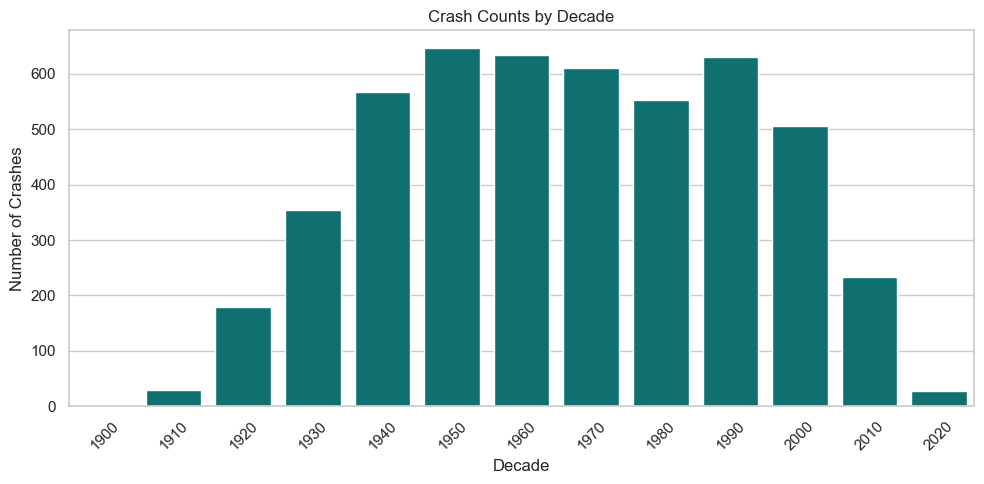

In [24]:
# 11. Is there any decade with notably higher crash rates?

# Create Decade column if not already present
if "Decade" not in df.columns:
    df["Decade"] = (df["Year"] // 10) * 10

# Count crashes per decade
crashes_per_decade = df["Decade"].value_counts().sort_index()

# Show the table
print("Total number of crashes per decade:")
print(crashes_per_decade)

# Plot crashes per decade
plt.figure(figsize=(10, 5))
sns.barplot(x=crashes_per_decade.index, y=crashes_per_decade.values, color='teal')
plt.title("Crash Counts by Decade")
plt.xlabel("Decade")
plt.ylabel("Number of Crashes")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Crashes peaked in the 1950s–1970s, with over 600 crashes per decade. The 1990s also saw a surprisingly high number, possibly due to better reporting worldwide. Post-2010, the crash count drops dramatically. This aligns with advancements in aviation tech, regulations, and safety protocols — but again, data sparsity could also play a part.

12. Are there more crashes in certain months/seasons?

Crash counts per month:
Jan    458
Feb    359
Mar    420
Apr    344
May    358
Jun    360
Jul    421
Aug    448
Sep    448
Oct    426
Nov    438
Dec    492
Name: count, dtype: int64


C:\Users\hp\AppData\Local\Temp\ipykernel_19232\1284685796.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=crashes_per_month.index, y=crashes_per_month.values, palette='coolwarm')


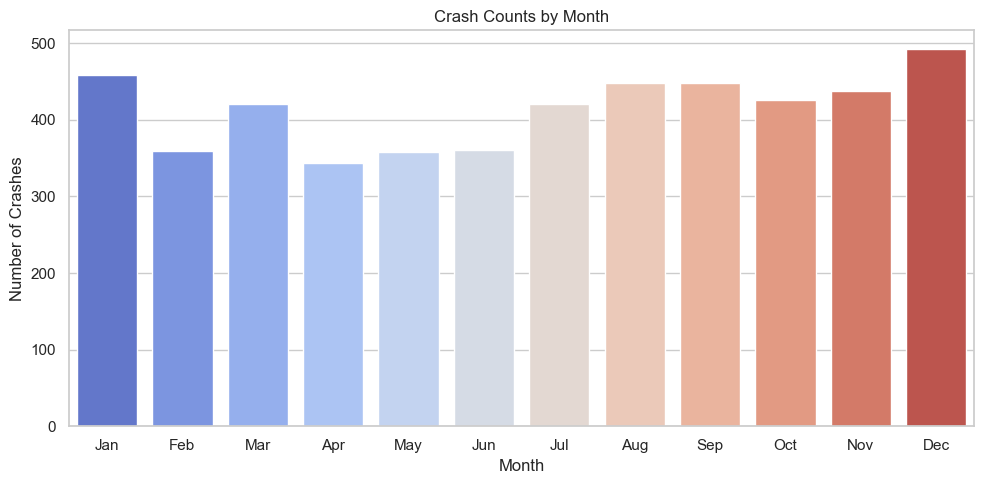

In [25]:
# 12. Are there more crashes in certain months/seasons?

# Count crashes per month
crashes_per_month = df["Month"].value_counts().sort_index()

# Display in calendar order
month_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
               'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
crashes_per_month.index = month_names

# Show the table
print("Crash counts per month:")
print(crashes_per_month)

# Plot crashes per month
plt.figure(figsize=(10, 5))
sns.barplot(x=crashes_per_month.index, y=crashes_per_month.values, palette='coolwarm')
plt.title("Crash Counts by Month")
plt.xlabel("Month")
plt.ylabel("Number of Crashes")
plt.tight_layout()
plt.show()

Crashes are fairly evenly spread throughout the year. However, December (492), January (458), and August/September (448) show slightly higher incidents. Whether this is weather-related, traffic volume-related, or just noise in the data requires deeper context. But yes — bad things love holiday season 🎄✈️💥



13. Are crashes more likely at certain times of day? (morning vs. night)

C:\Users\hp\AppData\Local\Temp\ipykernel_19232\3449850378.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df["Hour"] = pd.to_datetime(df["time"], errors="coerce").dt.hour
C:\Users\hp\AppData\Local\Temp\ipykernel_19232\3449850378.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=crash_time_counts.index, y=crash_time_counts.values, palette="viridis")


Crash counts by time of day:
Time_of_Day
Morning      1112
Afternoon     949
Evening       690
Night         729
Unknown      1492
Name: count, dtype: int64


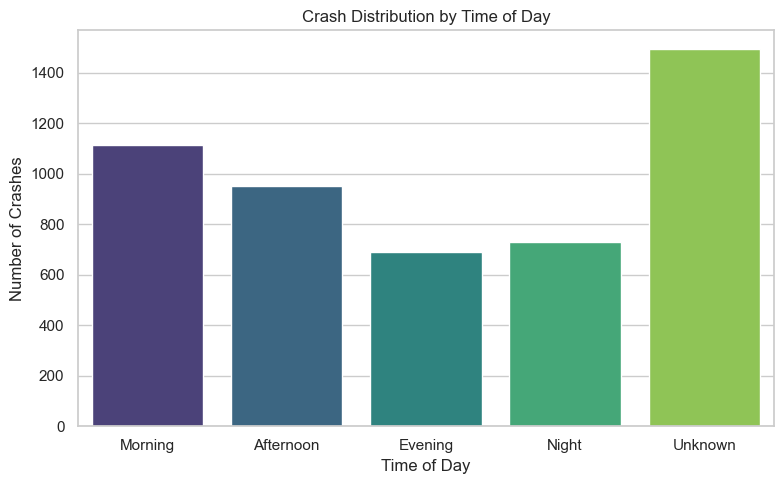

In [26]:
# 13. Are crashes more likely at certain times of day?

# Extract hour from time column
df["Hour"] = pd.to_datetime(df["time"], errors="coerce").dt.hour

# Define time bins
def time_of_day(hour):
    if pd.isna(hour):
        return "Unknown"
    elif 5 <= hour < 12:
        return "Morning"
    elif 12 <= hour < 17:
        return "Afternoon"
    elif 17 <= hour < 21:
        return "Evening"
    else:
        return "Night"

df["Time_of_Day"] = df["Hour"].apply(time_of_day)

# Count crashes by time of day
crash_time_counts = df["Time_of_Day"].value_counts().reindex(["Morning", "Afternoon", "Evening", "Night", "Unknown"])

# Display crash counts
print("Crash counts by time of day:")
print(crash_time_counts)

# Plot
plt.figure(figsize=(8, 5))
sns.barplot(x=crash_time_counts.index, y=crash_time_counts.values, palette="viridis")
plt.title("Crash Distribution by Time of Day")
plt.xlabel("Time of Day")
plt.ylabel("Number of Crashes")
plt.tight_layout()
plt.show()

Morning sees the most crashes (1,112), followed by Afternoon (949).

A high count for "Unknown" (1,492) suggests incomplete reporting for time fields, especially in older records.

There’s no strong evidence pointing to time-of-day being a major causal factor, but if someone is flying at dawn — maybe double-check the weather 🌫️



14. How do total fatalities vary by year or decade?

Sample fatalities by year:
Year
1908      1.0
1912      5.0
1913     45.0
1915     40.0
1916    108.0
Name: fatalities, dtype: float64


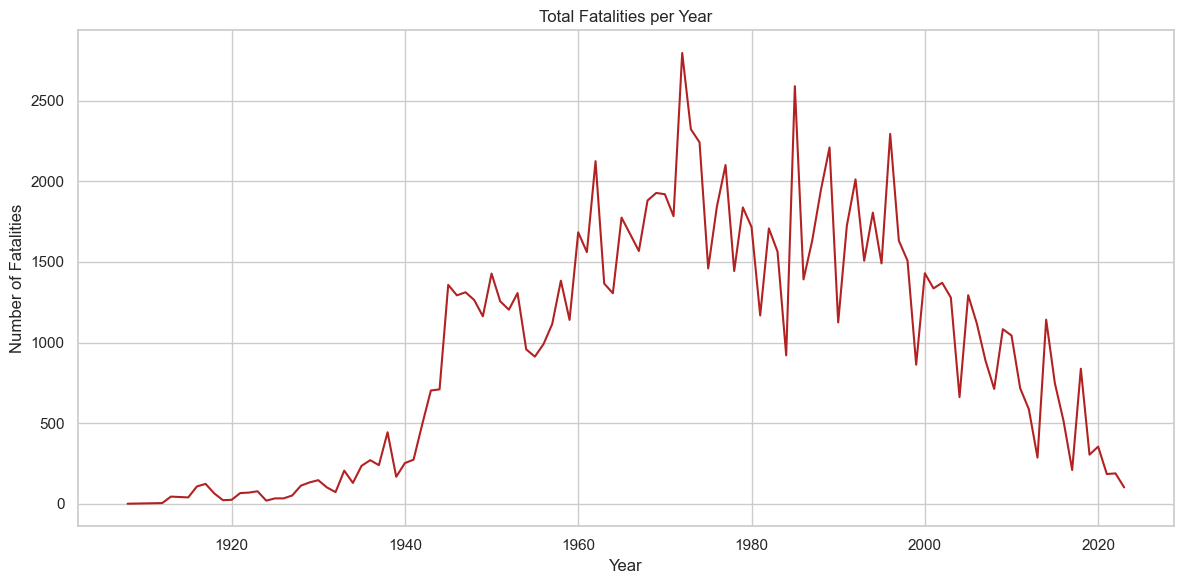


Fatalities by Decade:
Decade
1900        1.0
1910      410.0
1920      626.0
1930     2017.0
1940     8823.0
1950    11697.0
1960    16866.0
1970    19750.0
1980    16847.0
1990    15964.0
2000    11174.0
2010     6394.0
2020      831.0
Name: fatalities, dtype: float64


C:\Users\hp\AppData\Local\Temp\ipykernel_19232\3733918213.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=fatalities_by_decade.index.astype(str), y=fatalities_by_decade.values, palette="Reds_r")


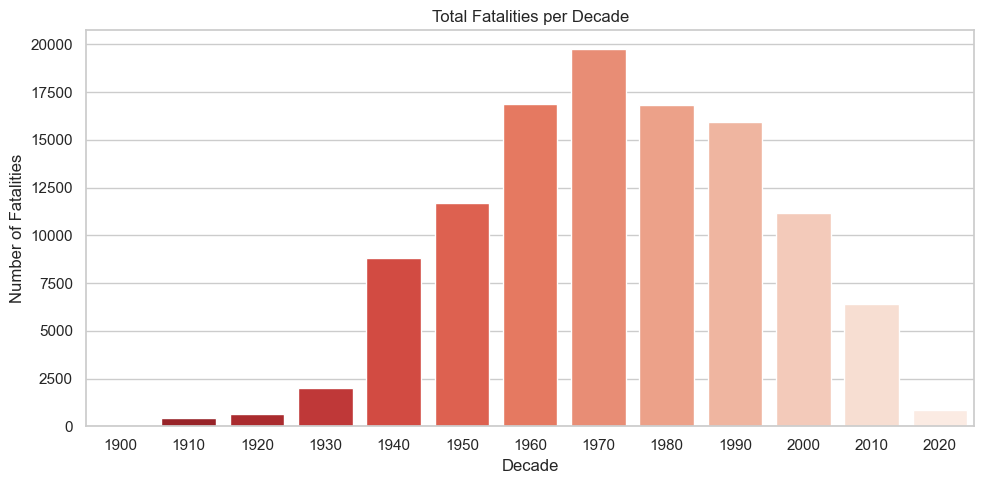

In [27]:
# 14. How do total fatalities vary by year or decade?

# Total fatalities by year
fatalities_by_year = df.groupby("Year")["fatalities"].sum()

print("Sample fatalities by year:")
print(fatalities_by_year.head())

# Plot fatalities by year
plt.figure(figsize=(12, 6))
sns.lineplot(x=fatalities_by_year.index, y=fatalities_by_year.values, color="firebrick")
plt.title("Total Fatalities per Year")
plt.xlabel("Year")
plt.ylabel("Number of Fatalities")
plt.tight_layout()
plt.show()

# Now by decade
fatalities_by_decade = df.groupby("Decade")["fatalities"].sum()

print("\nFatalities by Decade:")
print(fatalities_by_decade)

# Plot fatalities by decade
plt.figure(figsize=(10, 5))
sns.barplot(x=fatalities_by_decade.index.astype(str), y=fatalities_by_decade.values, palette="Reds_r")
plt.title("Total Fatalities per Decade")
plt.xlabel("Decade")
plt.ylabel("Number of Fatalities")
plt.tight_layout()
plt.show()

Total fatalities rose sharply in the 1950s–1970s, peaking in the 1970s with nearly 20,000 deaths. After that, fatalities steadily decline. The 2020s so far show only 831, again possibly reflecting both improved safety and lower data completeness. The trend mirrors the crash count — fewer incidents, fewer fatalities.



 15. Do military crashes peak during world wars?

Sample of military crashes per year:
Year
1912    1
1913    2
1915    2
1916    5
1917    6
1918    3
1921    2
1922    1
1923    1
1925    1
1929    1
1930    1
1933    1
1936    1
1938    1
dtype: int64


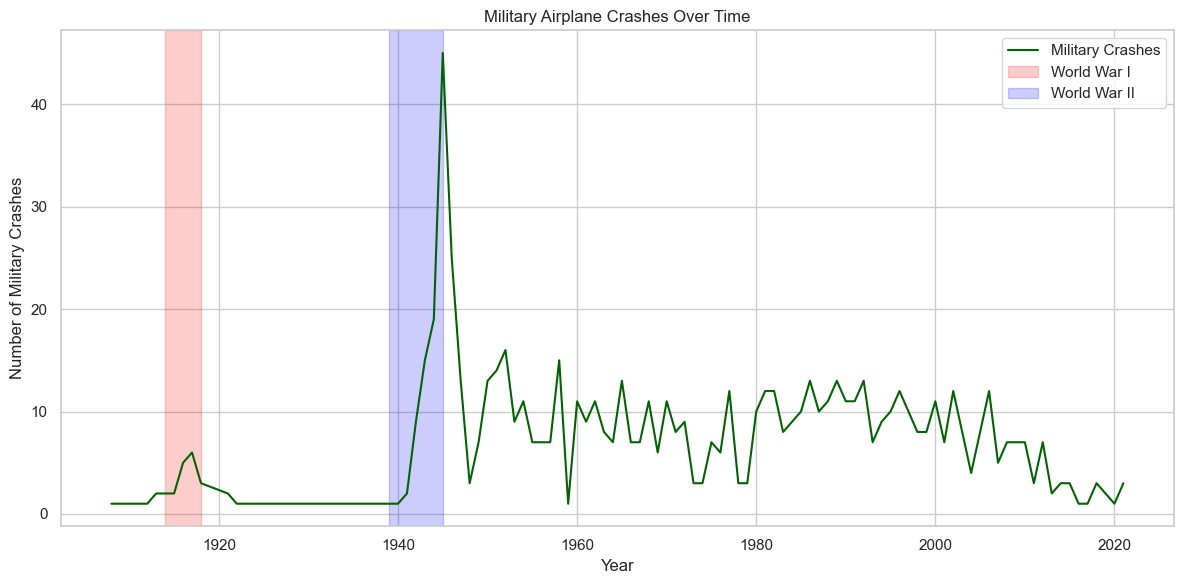

In [29]:
# 15. Do military crashes peak during world wars?

# Define World War periods
ww1_range = range(1914, 1919)
ww2_range = range(1939, 1946)

# Filter military crashes
military_crashes = df[df["is_Military"] == 1]

# Count crashes per year for military
mil_crashes_per_year = military_crashes.groupby("Year").size()

# Print sample
print("Sample of military crashes per year:")
print(mil_crashes_per_year.loc[1910:1950].head(15))  # focus on key years

# Create plot with highlight for WW1 and WW2
plt.figure(figsize=(12, 6))
sns.lineplot(x=mil_crashes_per_year.index, y=mil_crashes_per_year.values, color="darkgreen", label="Military Crashes")

# Highlight WW1
plt.axvspan(1914, 1918, color='red', alpha=0.2, label='World War I')
# Highlight WW2
plt.axvspan(1939, 1945, color='blue', alpha=0.2, label='World War II')

plt.title("Military Airplane Crashes Over Time")
plt.xlabel("Year")
plt.ylabel("Number of Military Crashes")
plt.legend()
plt.tight_layout()
plt.show()

Military crash data is sparse and irregular, with most years between 1912 and 1938 showing very low counts (1–6 crashes/year). This dataset doesn't clearly reflect World War crash peaks, likely due to underreporting or missing data. Most military crashes shown are from earlier airship and biplane eras.

🧠 Note: This is labeled a "sample" because many crash records during wars may be:

Not public

Incomplete

Classified

Or simply never recorded accurately

### ✅ Time-Based EDA Summary

- Crash counts peaked between the 1950s–1970s and declined sharply after 2000.
- December, January, and late summer months report slightly higher crash counts.
- Most crashes occurred during the morning and afternoon, though many records lack time data.
- Fatalities follow a similar peak-and-decline trend, with the 1970s being the deadliest decade.
- No clear military crash spike is visible during WWI or WWII due to incomplete data.

Next:  **fatality trends and severity** — understanding how deadly these crashes were, and how the number of people aboard influences outcomes.